In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

C:\Users\Mayur\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Mayur\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Mayur\AppData\Local\Temp\ipykernel_22824\1367956339.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as  pd


In [2]:
x = np.load("X.npy")
y = np.load("y.npy")

In [5]:
a_x_square = x[:, :, 0] * x[:, :, 0]
a_y_square = x[:, :, 1] * x[:, :, 1]
a_z_square = x[:, :, 2] * x[:, :, 2]
final_acc = (a_x_square + a_y_square + a_z_square)**0.5
final_acc.shape

(180, 500)

In [4]:
mean_acc = np.mean(final_acc, axis = 1)
mean_acc.shape

(180,)

In [5]:
mean_acc[:10]

array([0.99295325, 0.99682241, 0.99431437, 1.00013018, 1.00099264,
       1.00807124, 1.01739097, 1.00816041, 1.01207623, 1.00836867])

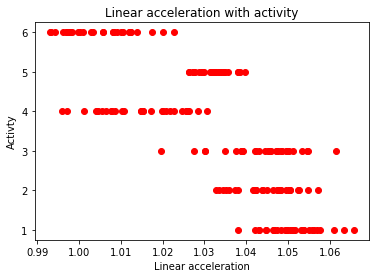

In [7]:
plt.scatter(mean_acc, y, c = 'r')
plt.ylabel("Activty"), plt.xlabel("Linear acceleration"), plt.title("Linear acceleration with activity")
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(mean_acc.reshape(-1, 1), y, test_size=0.4)

In [9]:
tree1 = DecisionTreeClassifier()
tree1.fit(x_train, y_train)
predictions = tree1.predict(x_test)
print("Accuracy when mean of accelerations was taken:", accuracy_score(predictions, y_test))

Accuracy when mean of accelerations was taken: 0.4722222222222222


In [10]:
acc_values1 = []
con_mats1 = []
depths = [i for i in range(2, 9)]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(x_train, y_train)
    predictions = tree.predict(x_test)
    acc_score = accuracy_score(predictions, y_test)
    acc_values1.append(acc_score)
    confusion_mat = confusion_matrix(predictions, y_test)
    con_mats1.append(confusion_mat)

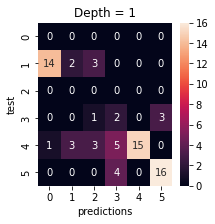

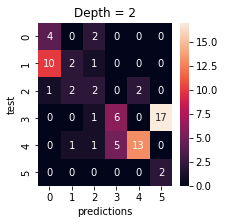

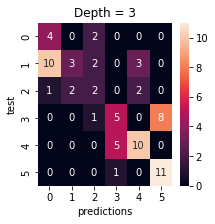

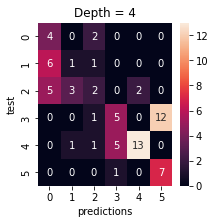

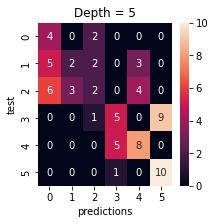

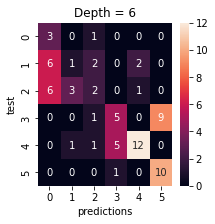

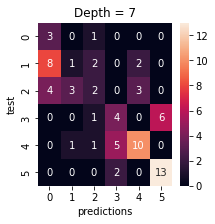

In [11]:
for i in range(len(con_mats1)):
    plt.figure(figsize=(3, 3))
    sns.heatmap(con_mats1[i], annot = True, fmt = 'd')
    plt.xlabel("predictions"), plt.ylabel("test"), plt.title(f"Depth = {i+1}")
    plt.show()